# Spatial Analysis

In [1]:
from descartes import PolygonPatch
import geopandas as gp
#import pysal as ps
import numpy as np
import pandas as pd

# Import libraries for visualization
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import json
from descartes import PolygonPatch
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl

In [3]:
# Open the geojson of NUTS 2 regions to get the coordinates of the regions
with open("/Users/maxbehrens/Documents/Msc/Thesis/Data/geo_data_2016/NUTS_RG_01M_2016_4326_LEVL_2.geojson") as f:
    nuts2_poly_2016 = json.load(f)

In [4]:
# Get the cleaned GDP data to match with regions and download correct data
gdp_data = pd.read_csv('/Users/maxbehrens/Documents/Msc/Thesis/Data/gdp_data/nuts_gdp_cleaned.csv')
gdp_data.head()

region  year    value code  country
0     BE  2008  33100.0   BE  Belgium
1    BE1  2008  61100.0   BE  Belgium
2   BE10  2008  61100.0   BE  Belgium
3    BE2  2008  33100.0   BE  Belgium
4   BE21  2008  39200.0   BE  Belgium

In [5]:
# Countries which are banned from the analysis
banned_mean_countries = ['FI','SE','NO','BE']

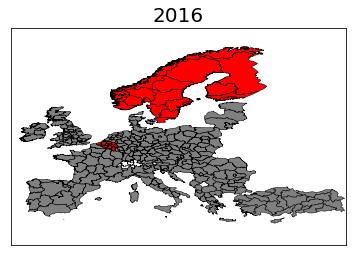

<Figure size 1440x720 with 0 Axes>

In [39]:
poly_used = []
poly_banned = []
poly_not = []

# Years used in the analysis
years = [2016]

# Iterate through years to create plot for each year
for year in years:

    # Iterate through NUTS 2 regions
    for i in range(len(nuts2_poly_2016['features'])):

        # If region in banned countries then colour it red
        if nuts2_poly_2016['features'][i]['properties']['NUTS_ID'][:2] in banned_mean_countries:
            
            # Multipolygon, only use main polygon
            if nuts2_poly_2016['features'][i]['geometry']['type'] == 'MultiPolygon':
                t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0][0]
            else:    
                t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0]

            x = [coord[0] for coord in t]
            y = [coord[1] for coord in t]

            # Convert to polygon and append to list
            p = Polygon(tuple(zip(x,y)))
            poly_banned.append(p)

        # If polygon was used, then append to specific list and colour it grey
        elif np.any(gdp_data.loc[gdp_data['year']==year,'region'].isin([nuts2_poly_2016['features'][i]['properties']['NUTS_ID']])):
            if nuts2_poly_2016['features'][i]['geometry']['type'] == 'MultiPolygon':
                t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0][0]
            else:    
                t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0]

            x = [coord[0] for coord in t]
            y = [coord[1] for coord in t]

            p = Polygon(tuple(zip(x,y)))
            poly_used.append(p)

        # If polygon was not used, append to other list
        else:
            if nuts2_poly_2016['features'][i]['geometry']['type'] == 'MultiPolygon':
                t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0][0]
            else:    
                t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0]

            x = [coord[0] for coord in t]
            y = [coord[1] for coord in t]

            p = Polygon(tuple(zip(x,y)))
            poly_not.append(p)

    # Create empty plot
    fig, ax = plt.subplots()

    # Colour used regions in grey
    p = PatchCollection(poly_used, color='gray',lw=0.5,edgecolor='k')
    ax.add_collection(p)

    # Colour used regions in red
    p = PatchCollection(poly_banned, color='red',lw=0.5,edgecolor='k')
    ax.add_collection(p)

    # Colour used regions in "white"
    p = PatchCollection(poly_not, color='white',lw=0.5,edgecolor='k')
    ax.add_collection(p)

    # Create plot and save it
    ax.autoscale_view()
    ax.set_xlim((-12,45))
    ax.set_ylim((30,75))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(str(year), fontdict={'fontsize':20})
    plt.figure(figsize=(20,10))
    plt.show()
    fig.savefig(str('/Users/maxbehrens/Documents/Msc/Thesis/Data/plots/nuts'+str(year)+'_mapping.png'), dpi=150, bbox_inches='tight', pad_inches=0.01)